In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load the dataset
df = pd.read_csv('./world-happiness-report-2019.csv')
#Check the names of the columns
df.head()

,Country(region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [2]:
#Interpreting the rows and columns in data table
df.shape


(156, 11)

In [3]:
#Renaming some columns in the dataset
df = df.rename(columns = {'Country(region)':'Country', 'SD of Ladder':'SDofLadder', 'Positive affect':'PositiveAffect', 
                          'Negative affect':'NegativeAffect', 'Social support':'SocialSupport',
                          'Log of GDP\nper capita':'LogOfGDP', 'Healthy life\nexpectancy':'Healthy'
                         })

In [4]:
#Getting an idea about the dataset
df.describe()

,Ladder,SDofLadder,PositiveAffect,NegativeAffect,SocialSupport,Freedom,Corruption,Generosity,LogOfGDP,Healthy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [5]:
#Checking the Rangeindex, Data columns, datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country           156 non-null object
Ladder            156 non-null int64
SDofLadder        156 non-null int64
PositiveAffect    155 non-null float64
NegativeAffect    155 non-null float64
SocialSupport     155 non-null float64
Freedom           155 non-null float64
Corruption        148 non-null float64
Generosity        155 non-null float64
LogOfGDP          152 non-null float64
Healthy           150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [6]:
#Finding out the number of Nulls in the whole dataset
df.isnull().sum()

Country           0
Ladder            0
SDofLadder        0
PositiveAffect    1
NegativeAffect    1
SocialSupport     1
Freedom           1
Corruption        8
Generosity        1
LogOfGDP          4
Healthy           6
dtype: int64

In [7]:
def clean_data(df):
    '''  
    INPUT
    df = pandas data frame
    
    OUTPUT
    X = a variable we want to consider while predicting the response
    y = the corresponding response vector
    
    This function cleans df using the following steps to get X and y
    1.Takes a variable vars
    2.Noticed that in this dataset all the columns which have Nans are of data type float
    3.Run a loop to fill all those columns with the mean
    4.The data is cleaned, therefore no Nans
    5.In this dataset there is  no need of using get_dummies as it is not relevant here
    
    '''

    vars = df.select_dtypes(include=['float']).columns

    for col in vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    y = df['Country'] 

    df = df.drop(['Country'], axis=1)

    X = df
    return X,y
    
X, y = clean_data(df)
        

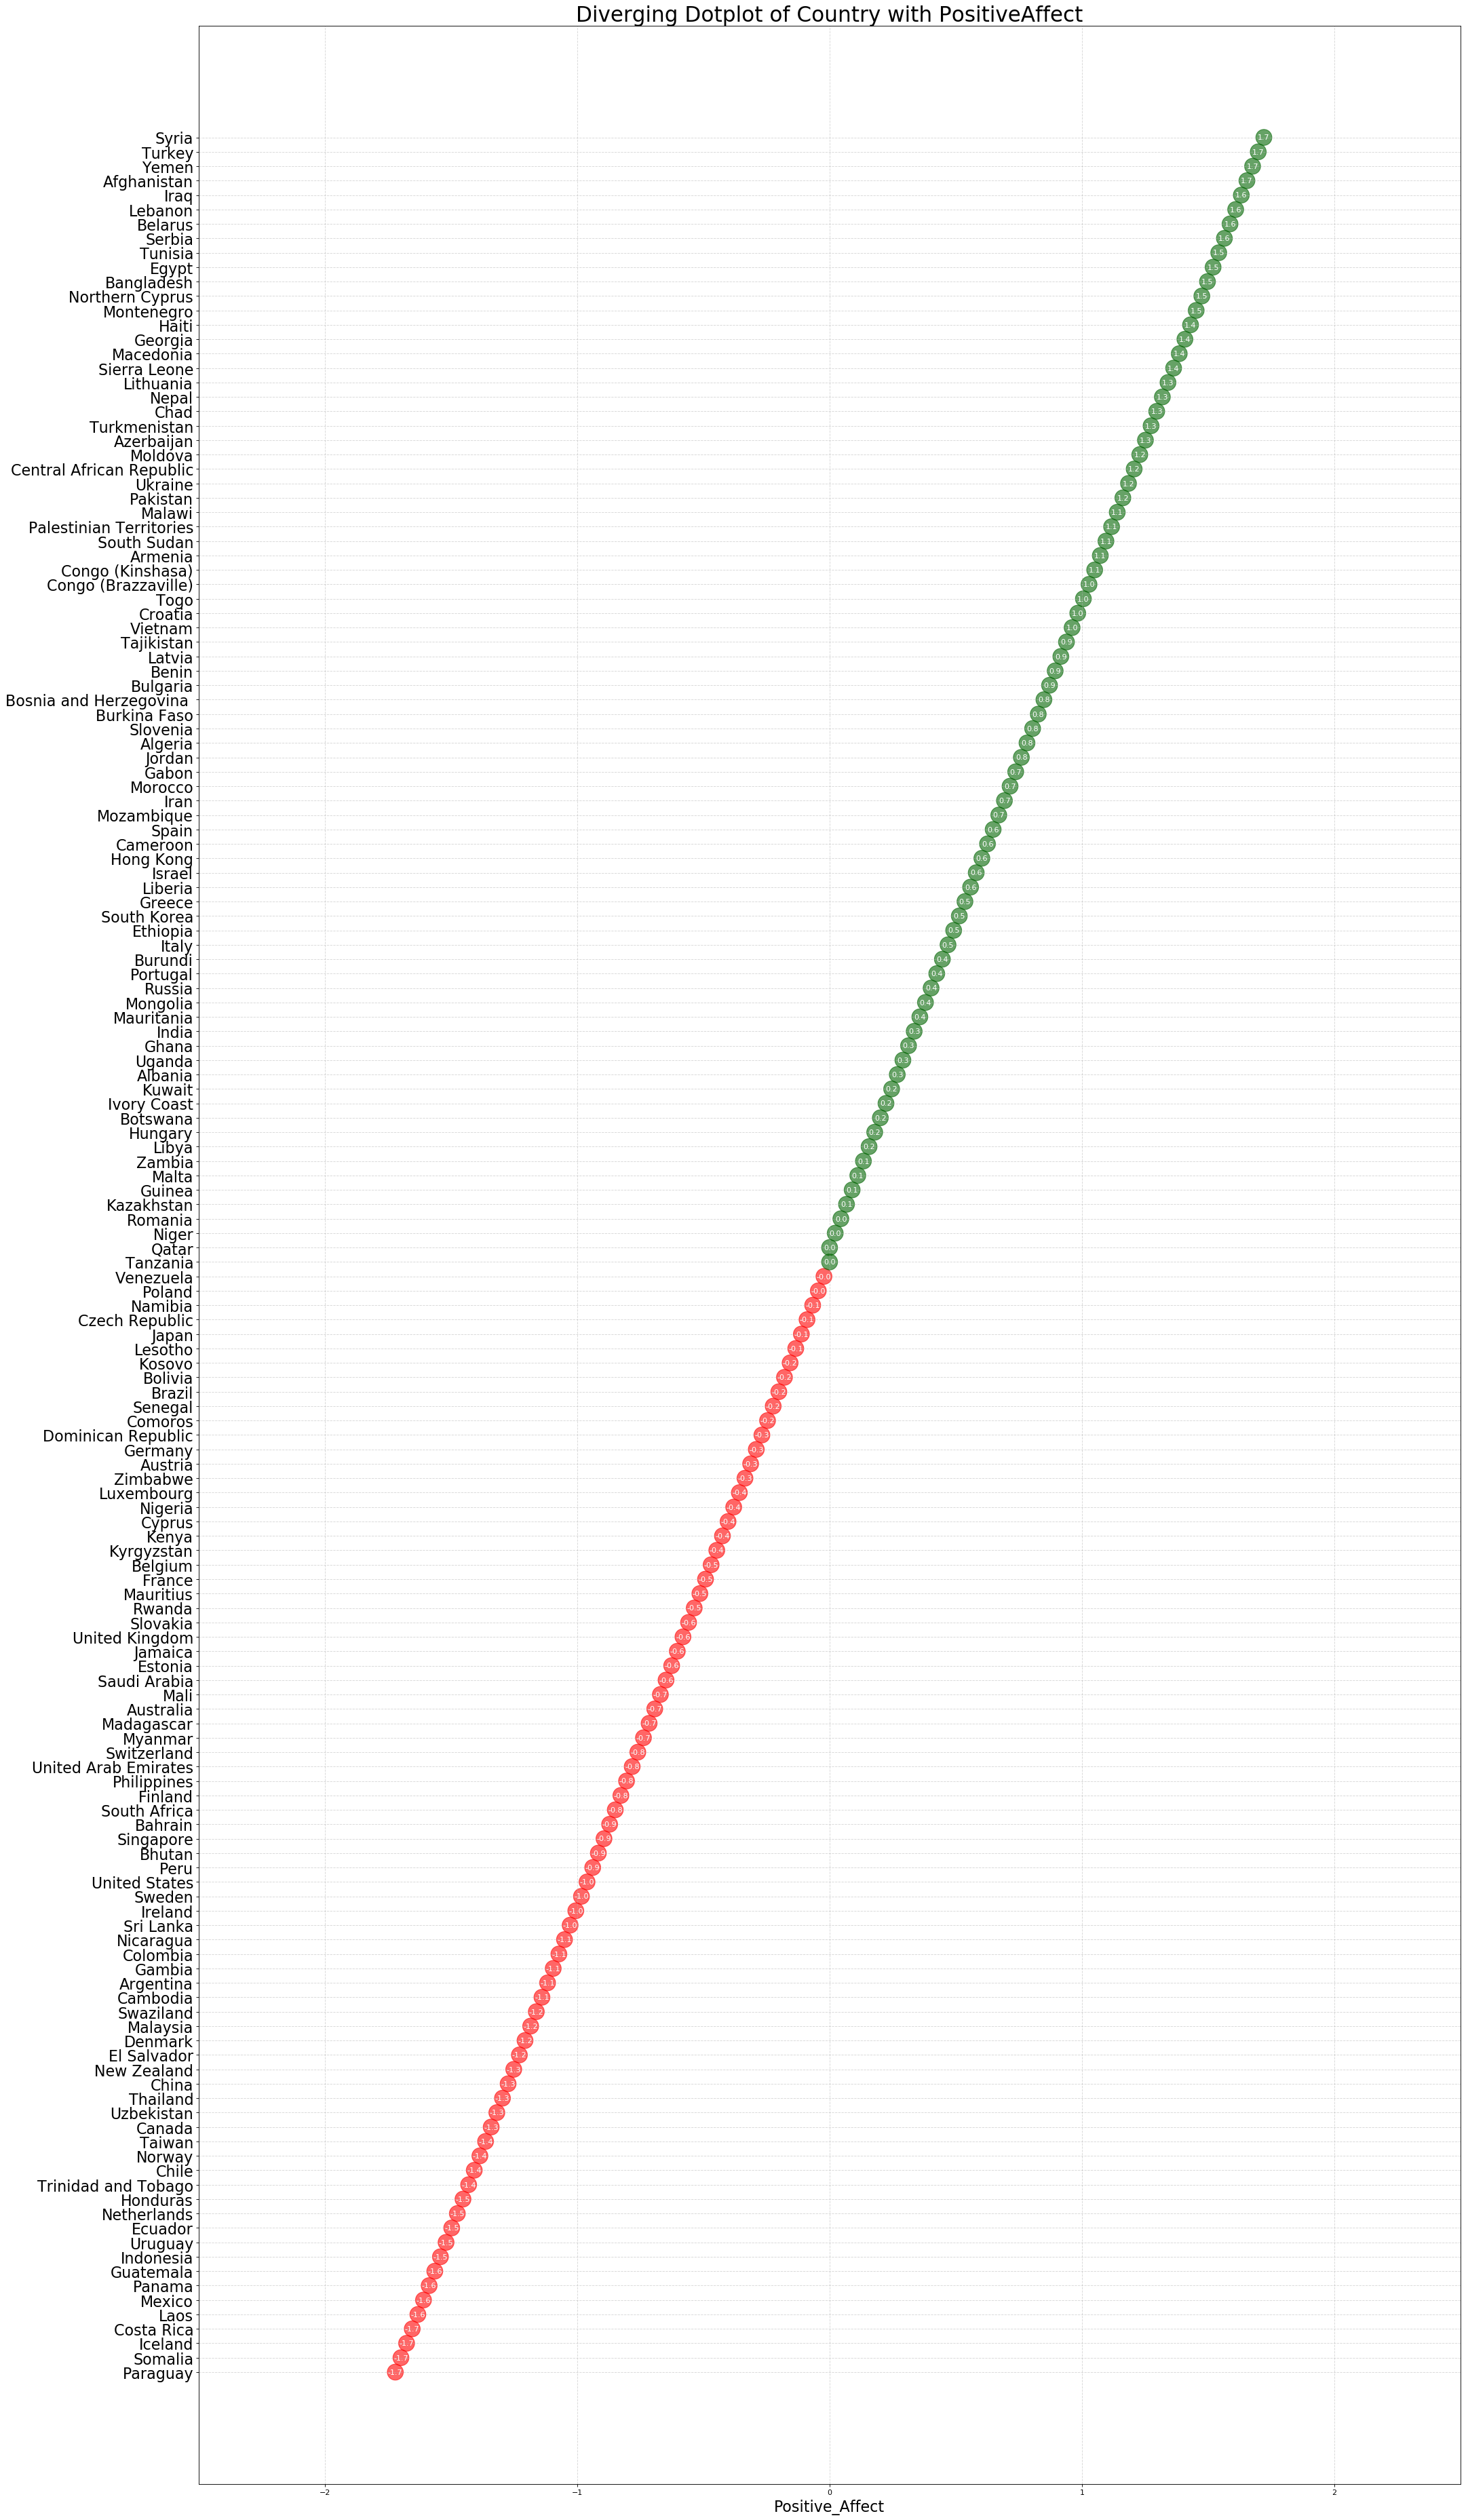

In [8]:
#Plotting a  Diverging dataplot
#Prepare data
x=df.loc[:, ['PositiveAffect']]
df['PA'] = (x-x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['PA']]
df.sort_values('PositiveAffect', inplace=True)
df.reset_index(inplace=True)

#Draw plot
import matplotlib.patches as patches
plt.figure(figsize=(30,60), dpi=80)
plt.scatter(df.PA, df.index, color=df.colors, s=450, alpha=0.6)
for x, y, tex in zip(df.PA, df.index, df.PA):
    t=plt.text(x, y, round(tex, 1), horizontalalignment='center', verticalalignment='center',fontdict={'color':'white'}) 

plt.yticks(df.index, df.Country, fontsize=20)
plt.title('Diverging Dotplot of Country with PositiveAffect', fontsize=28)
plt.xlabel('Positive_Affect', fontsize=20)
plt.grid(linestyle= '--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()



From the plot we can see the measure of positive emotion verses each country. The people in the countries with green color are
the people with more positive emotion and the government of the countries in red have to design certain development policies
to improve positive emotion among people which finally leads to improving the Happiness Score
     According to the plot the people belonging to Syria, Turkey, Yemen have highest positive emotion and the people of 
Paraguay, Somalia, Keland have lowest positive emotion and we can notice that Qatar was the only row with missing value for 
PositiveAffect, which we filled with mean has come exactly in the center    

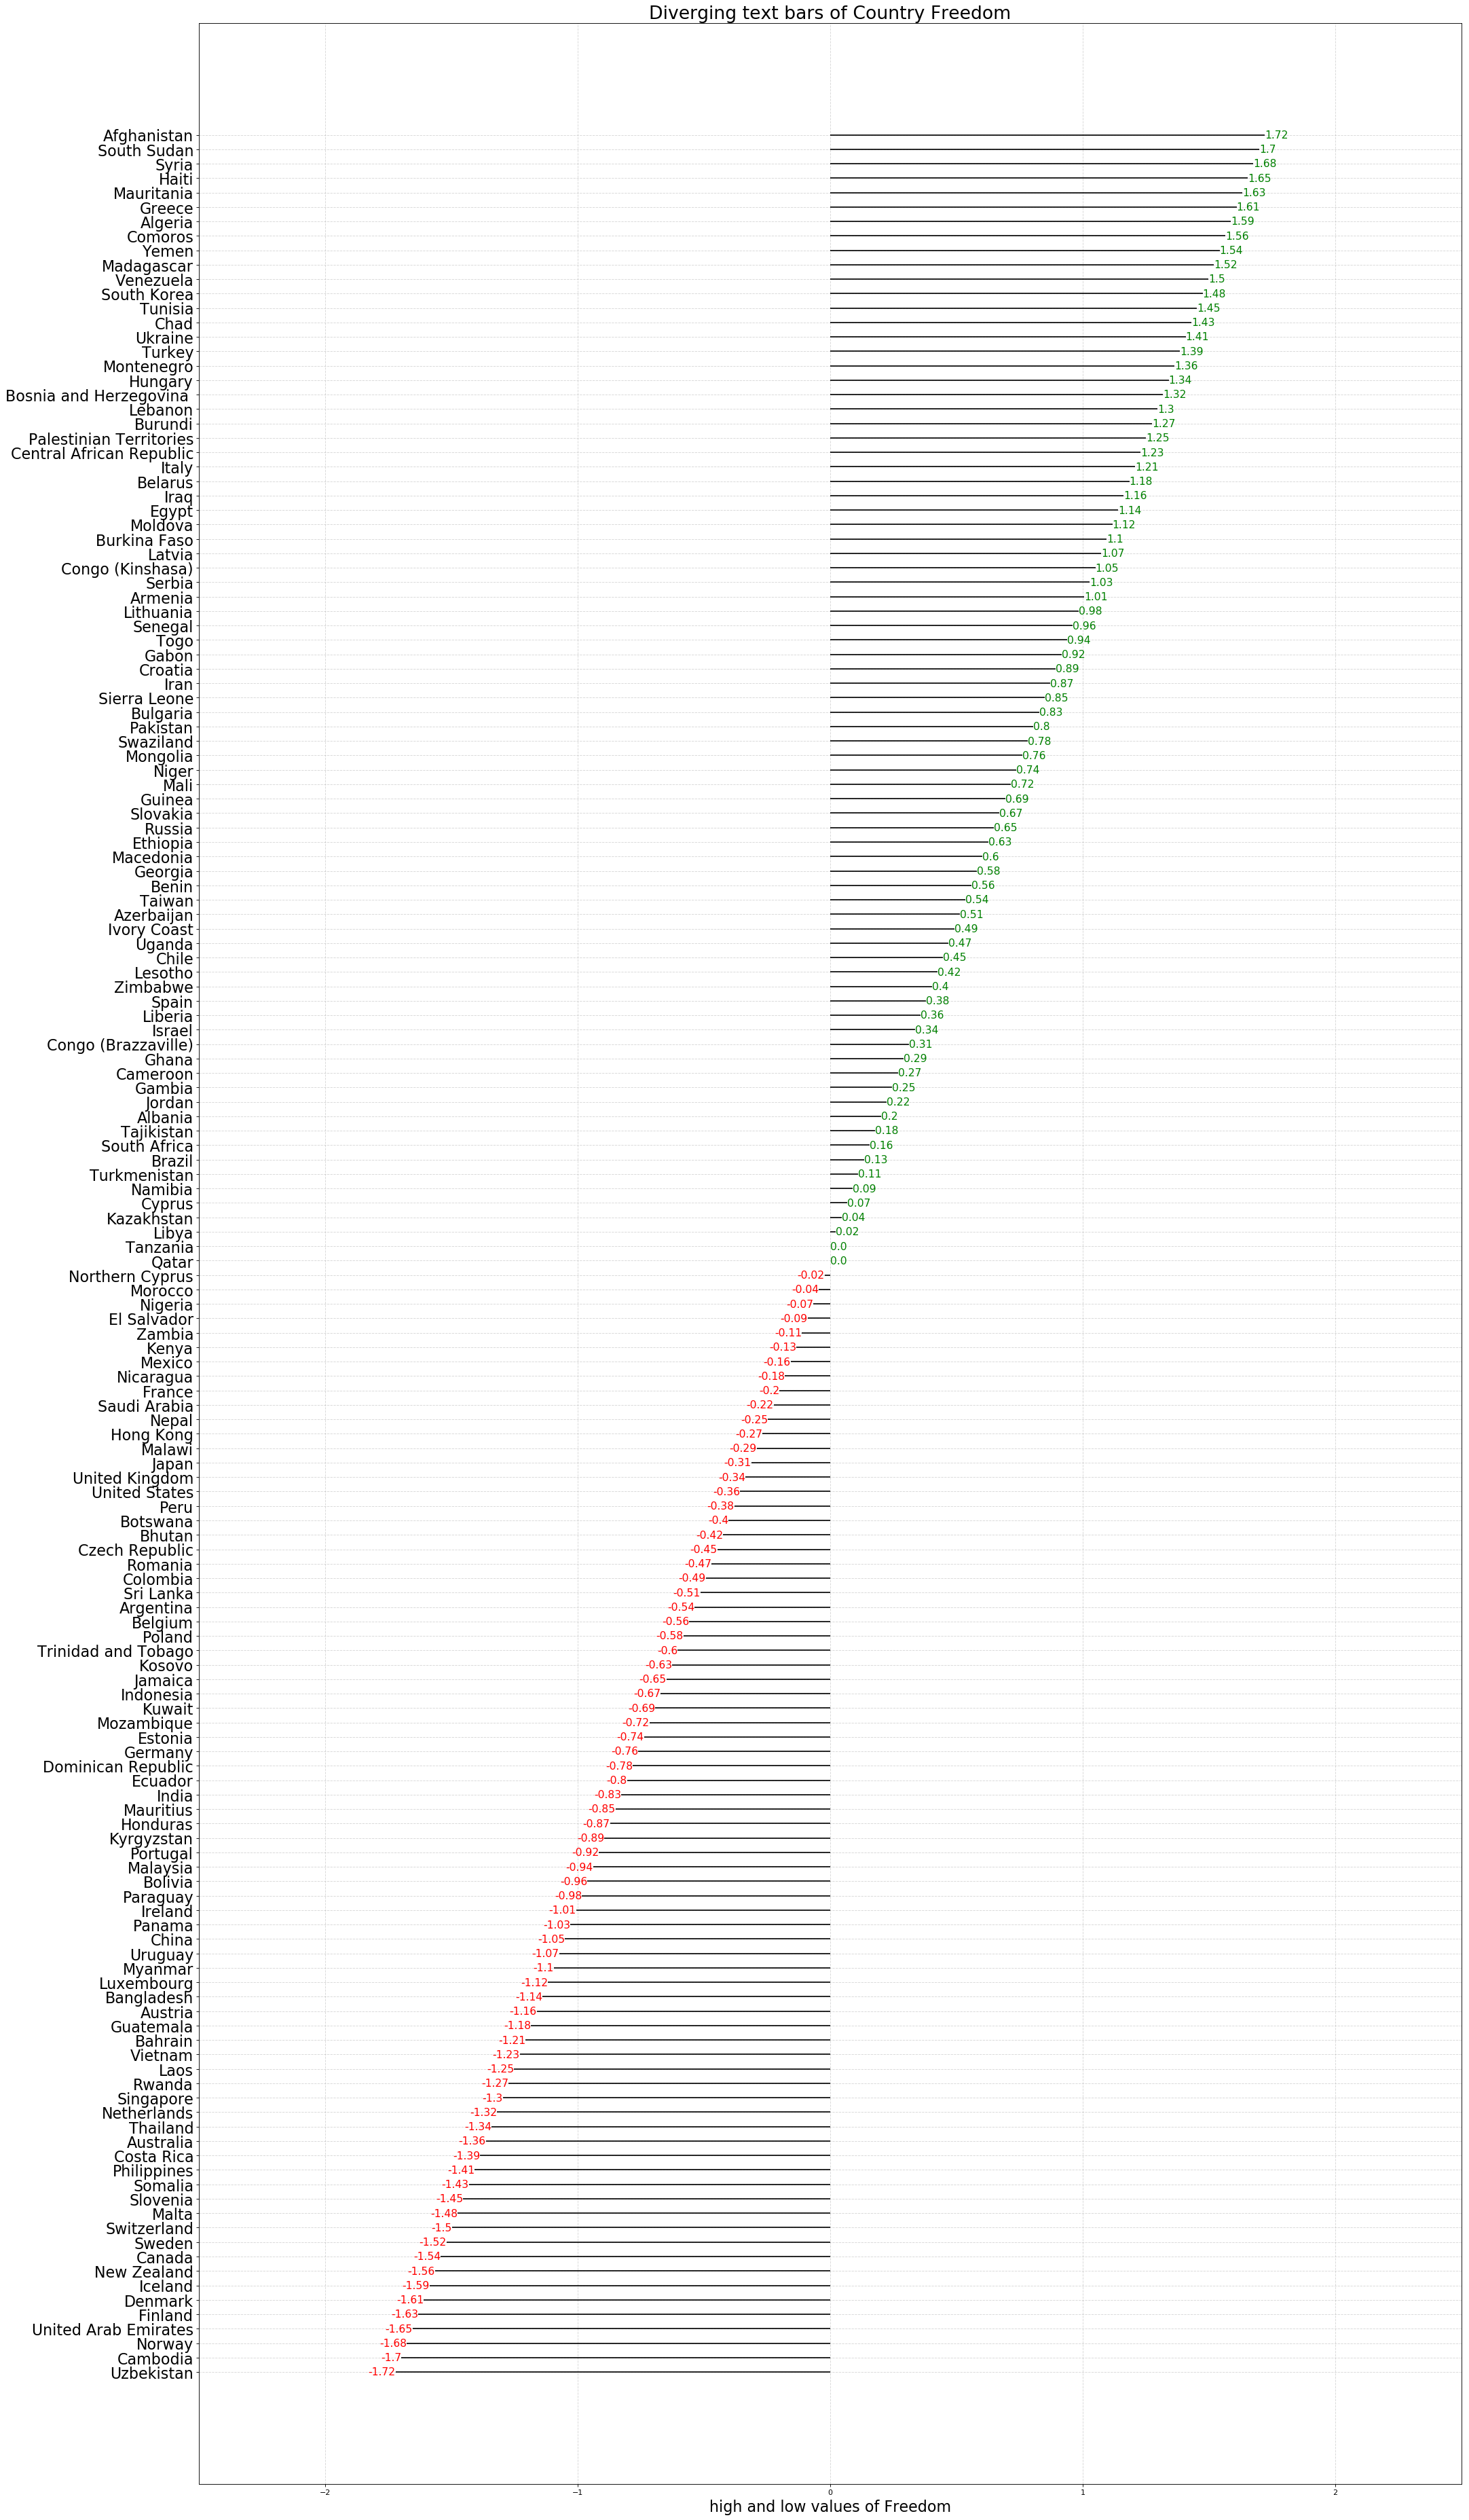

In [9]:
#Plotting diverging text bars
#Prepare data
#x=df.loc[:, ['Freedom']]
x=df['Freedom']
df['Fr']=(x-x.mean())/x.std()
df['colors']=['red' if x < 0 else 'green' for x in df['Fr']]
df.sort_values('Fr', inplace=True)
df.reset_index(inplace=True)

#Draw plot
plt.figure(figsize=(30, 60), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.Fr)
for x, y, tex in zip(df.Fr, df.index, df.Fr):
    t=plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
               verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size': 14 })
    
#Decorators
plt.yticks(df.index, df.Country, fontsize=20)
plt.title('Diverging text bars of Country Freedom', fontsize=24)
plt.xlabel('high and low values of Freedom', fontsize=20)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()             


From the above plot we can see the extent to which Freedom contributed to the calculation of Happiiness score. 
We can see with what value each country has deviated from the mean value, the posiive values in green and the negative
values in red.
    Afghanisthan, South Sudan, Syria have the highest values and Uzbekistan, Cambodia, Norway have the lowest values. 
Qatar which is having a missing value for Freedom is filled with mean which is exactly in the middle in the plot. The Government
has to take extra measures for their people to contribute more for the Happiness Score.
    From the above two plots we can see that our clean_data() function is performing correctly the way we wanted.

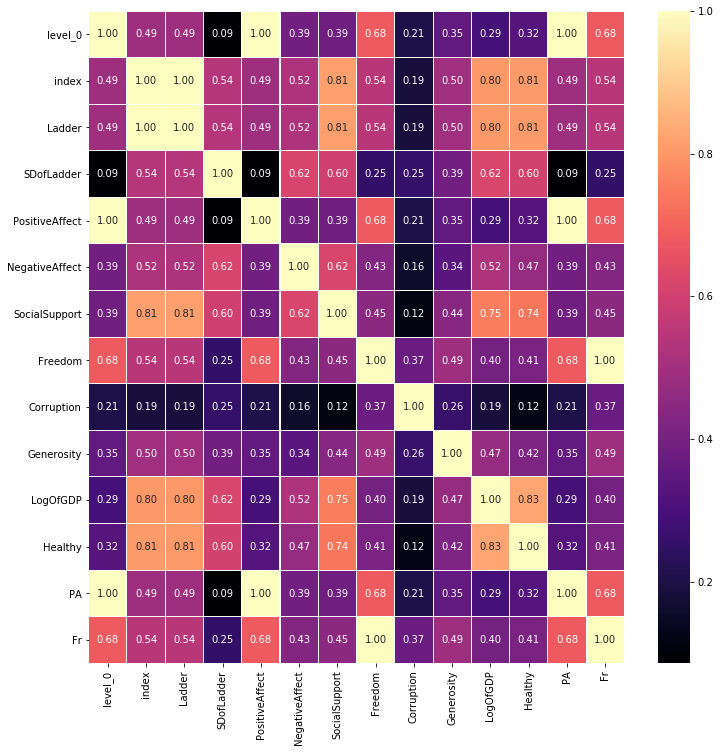

In [10]:
#Plotting a heatmap
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidth=0.05, fmt='.2f', cmap='magma')
plt.show()

A heat map is a two dimensional representation of data in which values are represented by colors. They use color to 
communicate relationship between data values that would be harder to understand if presented numerically. It provides an 
immediate visual summary of information. They are extremely versatile in drawing attention to trends. Colors are easy 
to distinguish and make sense of the data here. The darker the shade the greater the quantity. 

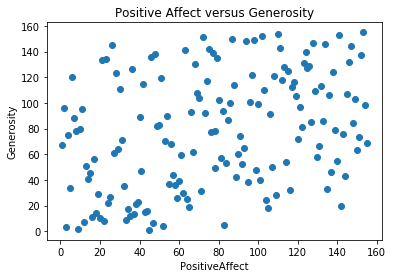

In [11]:
#Scatter Plot
plt.scatter(df['PositiveAffect'], df.Generosity)
plt.xlabel('PositiveAffect')
plt.ylabel('Generosity')
plt.title('Positive Affect versus Generosity')
plt.show()

Scatter plots show how two variables are correlated. From the above plot we can see that there is no linear or parabolic
relationship between the two variables namely PositiveAffect and Generosity. We can say that many data points are scattered 
in this area which shows that, the emotion of PositiveAffect and the extent to which Generosity plays for the Government
davelopment policy for many Countries is vital. Here we cannot see a relationship as such, that if PositiveAffect increases
Generosity increases and vice-versa but by viewing many datpoints in the scatter, and as both the values increase the 
datapoints are also increasing we can say that, they both contribute much for the Countries development. 

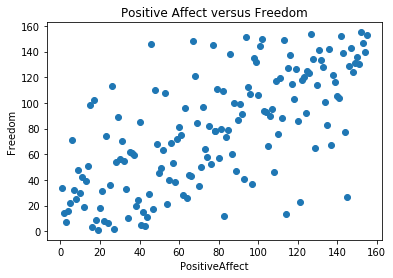

In [12]:
#Scatter Plot
plt.scatter(df['PositiveAffect'], df.Freedom)
plt.xlabel('PositiveAffect')
plt.ylabel('Freedom')
plt.title('Positive Affect versus Freedom')
plt.show()

Emotion of PositiveAffect and extent of Freedom are two different qualities of an individual and one is not dependent on the
other completely we can say they are dependent to a certain extent, but both contribute to the Countries Development. In the 
scatter plot ,there are many datapoints in this region which ascertains our conclusion that building the emotion of 
PositiveAffect in the people and increasing the Freedom of the people to an extent that can be taken care of, will help the
Countrty.

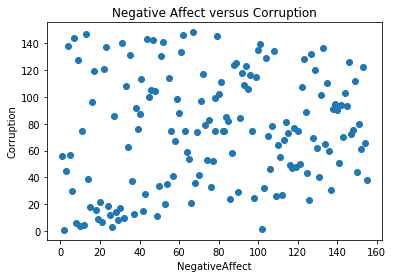

In [13]:
#Scatter Plot
plt.scatter(df['NegativeAffect'], df.Corruption)
plt.xlabel('NegativeAffect')
plt.ylabel('Corruption')
plt.title('Negative Affect versus Corruption')
plt.show()

The emotion of NegativeAffect and the extent of perception of Corruption are to an extent related to each other as the
Negative mind to a certain extent a cause for Corruption which can be seen from many data points in the plot. People with
no NegativeAffect may have Corruption in their mind. These both are bad qualities and should be less for the overall Countries
Development

In [14]:
df.head()

,level_0,index,Country,Ladder,SDofLadder,PositiveAffect,NegativeAffect,SocialSupport,Freedom,Corruption,Generosity,LogOfGDP,Healthy,PA,colors,Fr
0,18,40,Uzbekistan,41,99,19.0,15.0,11.0,1.0,18.0,29.0,104.0,83.0,-1.318621,red,-1.720912
1,26,108,Cambodia,109,135,27.0,142.0,109.0,2.0,94.0,61.0,116.0,102.0,-1.139825,red,-1.698563
2,15,2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,-1.385669,red,-1.676213
3,42,20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,74.5,15.0,4.0,60.0,-0.782233,red,-1.653864
4,40,0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,-0.826932,red,-1.631514


r2 Score: 0.6645202476981156


Text(0.5,1,'LinearRegression')

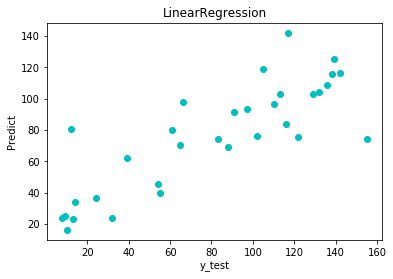

In [15]:
#Finding the r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

x = df.drop(['index', 'Country', 'Ladder', 'SDofLadder', 'PA', 'colors', 'Fr'], axis=1)
y = df['SDofLadder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)
lr=LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
print('r2 Score:' ,r2_score(y_test, predict_lr))
plt.scatter(y_test, predict_lr, color='c')
plt.xlabel('y_test')
plt.ylabel('Predict')
plt.title('LinearRegression')



r2_score is a goodness-of-fit measure for Linear Regression models. This statistic indicates the percentage of variance in 
the dependent variable that the independent variables explain collectively.
  Small r2_scores are not always a problem and high r2_scores are not necessarily good
    Statisticians say that a regression model fits the data well if the differences between the observations and the predicted
values are small and unbiased. Unbiased in this context means that the fitted values are not systematically too high or too
low anywhere in the observation space. As the r2_score value is 0.667571766 , So the data collected to a certain extent forms
a good collection without much bias.